In [8]:
import numpy as np
import pandas as pd

df=pd.read_csv('electricity bill dataset - Electricity_Bill.csv')

b=df.isnull().sum()
print(b)
df.head()


Month                  0
Units_Consumed         0
Fixed_Charge           0
Rate_per_Unit          0
Peak_Hours_Units       0
OffPeak_Hours_Units    0
Customer_Type          0
Region                 0
Year                   0
Bill_Amount            0
dtype: int64


,Month,Units_Consumed,Fixed_Charge,Rate_per_Unit,Peak_Hours_Units,OffPeak_Hours_Units,Customer_Type,Region,Year,Bill_Amount
0,1,152,150,7.0,103,169,Residential,North,2022,1300.5
1,2,485,150,7.0,199,182,Commercial,North,2023,741.5
2,3,320,150,7.0,153,70,Residential,East,2023,2782.5
3,4,156,150,6.5,185,56,Residential,East,2023,735.0
4,5,121,150,6.0,94,158,Residential,West,2024,689.5


In [ ]:
X = (df[["Units_Consumed", "Fixed_Charge", "Rate_per_Unit",
         "Peak_Hours_Units", "OffPeak_Hours_Units"]])


y=df['Bill_Amount'].values

from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X,y)





LinearRegression()

In [10]:
pred = model.predict(X)

df['pred'] = pred


slope = model.coef_[0]
intercept = model.intercept_

print('slope=',slope)
print('intercept=',intercept)

from sklearn.metrics import r2_score
r2 = r2_score(df['Bill_Amount'], df['pred'])
print('r2=',r2)
df



slope= -0.4555931376246511
intercept= 2235.922958778158
r2= 0.007682946952078051


,Month,Units_Consumed,Fixed_Charge,Rate_per_Unit,Peak_Hours_Units,OffPeak_Hours_Units,Customer_Type,Region,Year,Bill_Amount,pred
0,1,152,150,7.0,103,169,Residential,North,2022,1300.5,2258.586378
1,2,485,150,7.0,199,182,Commercial,North,2023,741.5,2147.346618
2,3,320,150,7.0,153,70,Residential,East,2023,2782.5,2304.157837
3,4,156,150,6.5,185,56,Residential,East,2023,735.0,2395.835448
4,5,121,150,6.0,94,158,Residential,West,2024,689.5,2250.173521
...,...,...,...,...,...,...,...,...,...,...,...
195,4,502,150,6.0,126,43,Commercial,East,2024,1736.0,2204.069804
196,5,86,150,6.0,143,186,Residential,East,2022,2626.5,2266.369952
197,6,209,150,6.5,67,87,Residential,North,2024,1573.5,2277.067085
198,7,58,150,6.0,53,54,Residential,South,2023,3855.0,2355.627398


In [11]:
from sklearn.metrics import r2_score
r2=r2_score(df['Bill_Amount'],df['pred'])
print('r2=',r2)
a=df['Bill_Amount'].mean()
print(a)
mean=df['pred'].mean()
print(mean)

r2= 0.007682946952078051
2233.7375
2233.7375


In [12]:
max=df['Peak_Hours_Units'].max()
print(max)

min=df['Peak_Hours_Units'].min()
print(min)


199
10


In [13]:
max1=df['OffPeak_Hours_Units'].max()
print(max1)

min1=df['OffPeak_Hours_Units'].min()
print(min1)

199
10


In [14]:
import pandas as pd


bins = [0, 40, 80, 120, 160, 200]
labels = [1, 2, 3, 4, 5]

df["Peak_Category"] = pd.cut(df["Peak_Hours_Units"], bins=bins, labels=labels)


bins = [0, 40, 80, 120, 160, 200]
labels = [1, 2, 3, 4, 5]

df["OffPeak_Category"] = pd.cut(df["OffPeak_Hours_Units"], bins=bins, labels=labels)

df



,Month,Units_Consumed,Fixed_Charge,Rate_per_Unit,Peak_Hours_Units,OffPeak_Hours_Units,Customer_Type,Region,Year,Bill_Amount,pred,Peak_Category,OffPeak_Category
0,1,152,150,7.0,103,169,Residential,North,2022,1300.5,2258.586378,3,5
1,2,485,150,7.0,199,182,Commercial,North,2023,741.5,2147.346618,5,5
2,3,320,150,7.0,153,70,Residential,East,2023,2782.5,2304.157837,4,2
3,4,156,150,6.5,185,56,Residential,East,2023,735.0,2395.835448,5,2
4,5,121,150,6.0,94,158,Residential,West,2024,689.5,2250.173521,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,4,502,150,6.0,126,43,Commercial,East,2024,1736.0,2204.069804,4,2
196,5,86,150,6.0,143,186,Residential,East,2022,2626.5,2266.369952,4,5
197,6,209,150,6.5,67,87,Residential,North,2024,1573.5,2277.067085,2,3
198,7,58,150,6.0,53,54,Residential,South,2023,3855.0,2355.627398,2,2


In [15]:
mean_values = df.groupby("Peak_Category")["Bill_Amount"].mean()

print(mean_values)

Peak_Category
1    2188.982759
2    2194.151515
3    2395.353659
4    2118.117021
5    2261.980000
Name: Bill_Amount, dtype: float64


C:\Users\Navaneetha Krishnan\AppData\Local\Temp\ipykernel_16840\1015325905.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_values = df.groupby("Peak_Category")["Bill_Amount"].mean()


Matplotlib is building the font cache; this may take a moment.
C:\Users\Navaneetha Krishnan\AppData\Local\Temp\ipykernel_16840\222669618.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(


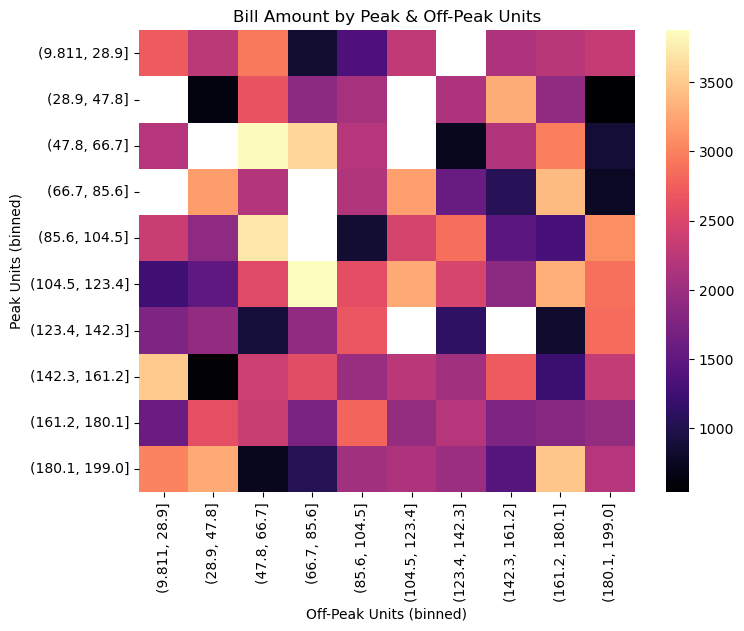

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
pivot = df.pivot_table(
    values='Bill_Amount',
    index=pd.cut(df['Peak_Hours_Units'], bins=10),
    columns=pd.cut(df['OffPeak_Hours_Units'], bins=10),
    aggfunc='mean'
)

plt.figure(figsize=(8,6))
sns.heatmap(pivot, cmap="magma", annot=False)
plt.title("Bill Amount by Peak & Off-Peak Units")
plt.xlabel("Off-Peak Units (binned)")
plt.ylabel("Peak Units (binned)")
plt.show()

Text(0, 0.5, 'Bill Amount')

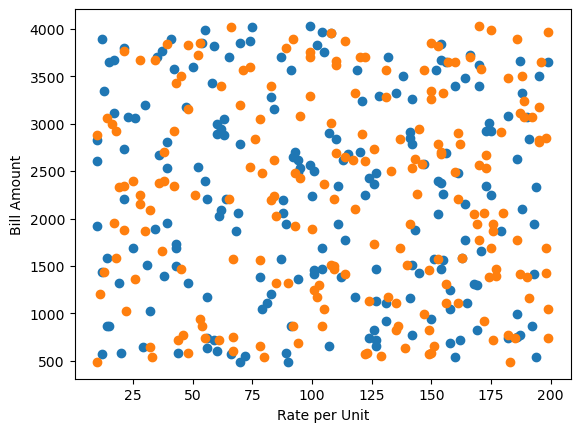

In [17]:

plt.plot(df['OffPeak_Hours_Units'], df['Bill_Amount'], 'o')
plt.xlabel('Units Consumed')
plt.ylabel('Bill Amount')
plt.plot(df['Peak_Hours_Units'], df['Bill_Amount'], 'o')
plt.xlabel('Rate per Unit')
plt.ylabel('Bill Amount')

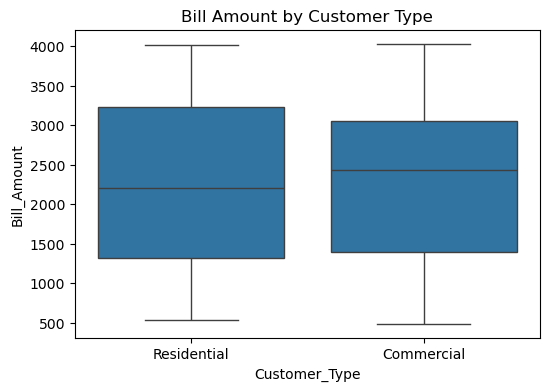

In [18]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Customer_Type", y="Bill_Amount", data=df)
plt.title("Bill Amount by Customer Type")
plt.show()

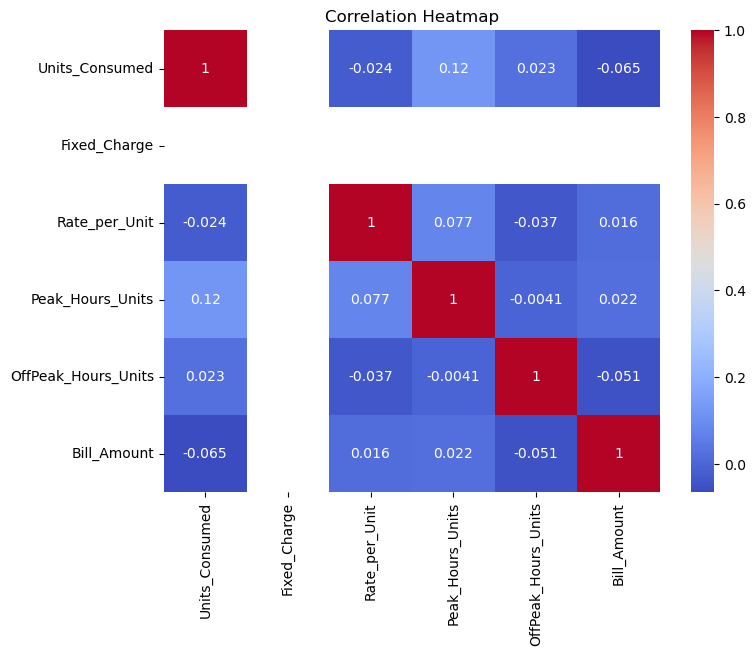

In [19]:

num_cols = ["Units_Consumed", "Fixed_Charge", "Rate_per_Unit",
            "Peak_Hours_Units", "OffPeak_Hours_Units"]
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols + ["Bill_Amount"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()